In [1]:
# Import modules
import rdkit
from rdkit.Chem import Descriptors
from rdkit.Chem.Lipinski import rdMolDescriptors
from IPython.display import SVG
from notebook_utils import draw_molecule

# Suppress RDKit Output
# rdkit.RDLogger.DisableLog('rdApp.*')

# Print versions
print(f"RDKit Version: {rdkit.__version__}")

RDKit Version: 2025.03.6


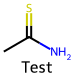

In [2]:
# smiles = "C1CC2=C(C=CC(=C2)O)[C@H]([C@H]1C3=CC=CC=C3)C4=CC=C(C=C4)N5CCC(CC5)CN6CCN(CC6)C7=CC8=C(C=C7)C(=O)N(C8)[C@H]9CCC(=O)NC9=O"
# name = "Vepdegestrant"
# smiles = "CC1(CCC(=C(C1)c2ccc(cc2)Cl)CN3CCN(CC3)c4ccc(c(c4)Oc5cc6cc[nH]c6nc5)C(=O)NS(=O)(=O)c7ccc(c(c7)[N+](=O)[O-])NCC8CCOCC8)C"
# name = "Venetoclax"
# smiles = "CC=NO"
smiles = "CC(N)=S"
name = "Test"
mol = rdkit.Chem.MolFromSmiles(smiles)
# Highlight nitrogen atoms in blue
img = draw_molecule(mol,
    legend = name,
)
SVG(img)

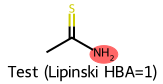

In [3]:
# Find all HBA atoms in the molecule, defined by Lipinski (All Ns and Os)
lipinski_hba_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomicNum() in (7, 8)]
hba = rdMolDescriptors.CalcNumLipinskiHBA(mol)

# Highlight nitrogen atoms in blue
img = draw_molecule(mol,
    legend = name + f" (Lipinski HBA={hba})", 
    highlight_atoms = lipinski_hba_atoms,
    highlight_color = (1.0, 0.4, 0.4)
)
SVG(img)

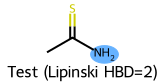

In [4]:
# Find all HBD atoms in the molecule, defined by Lipinski (All NHs and OHs)
lipinski_hba_atoms = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() in (7, 8)]
lipinski_hbd_atoms = [atom.GetIdx() for atom in lipinski_hba_atoms if atom.GetTotalNumHs() > 0]
hbd = rdMolDescriptors.CalcNumLipinskiHBD(mol)

# Highlight nitrogen atoms in blue
img = draw_molecule(mol,
    legend = name + f" (Lipinski HBD={hbd})", 
    highlight_atoms = lipinski_hbd_atoms,
    highlight_color = (0.4, 0.7, 1.0)
)
SVG(img)

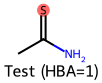

In [5]:
# Find all HBA atoms in the molecule, defined by The RDKit
HAcceptorSmarts = rdkit.Chem.MolFromSmarts(
    "[$([O,S;H1;v2]-[!$(*=[O,N,P,S])])," +
    "$([O,S;H0;v2])," +
    "$([O,S;-])," + 
    "$([N;v3;!$(N-*=!@[O,N,P,S])])," +
    "$([nH0,o,s;+0])]"
)
hba_atoms = [atom[0] for atom in mol.GetSubstructMatches(HAcceptorSmarts, uniquify=1)]
hba = Descriptors.NumHAcceptors(mol)

# Highlight nitrogen atoms in blue
img = draw_molecule(mol,
    legend = name + f" (HBA={hba})", 
    highlight_atoms = hba_atoms,
    highlight_color = (1.0, 0.4, 0.4)
)
SVG(img)

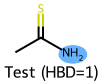

In [6]:
# Find all HBD atoms in the molecule, defined by The RDKit
HDonorSmarts = rdkit.Chem.MolFromSmarts(
    "[$([N;!H0;v3])," +
    "$([N;!H0;+1;v4])," + 
    "$([O,S;H1;+0])," +
    "$([n;H1;+0])]"
)
hbd_atoms = [atom[0] for atom in mol.GetSubstructMatches(HDonorSmarts, uniquify=1)]
hbd = Descriptors.NumHDonors(mol)

# Highlight nitrogen atoms in blue
img = draw_molecule(mol,
    legend = name + f" (HBD={hbd})", 
    highlight_atoms = hbd_atoms,
    highlight_color = (0.4, 0.7, 1.0)
)
SVG(img)

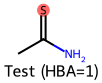

In [22]:
# Link: https://docs.eyesopen.com/python_modules/cookbook/cheminfo/acceptor-donor.html
# Link: https://docs.eyesopen.com/toolkits/python/molproptk/OEMolPropFunctions/OEGetHBondAcceptorCount.html
# Find all HBA atoms in the molecule, defined by OpenEye (SMARTS representation of ROCS, Journal of Computer-Aided Molecular Design, Vol. 10, pp. 607, 1996.)
HAcceptorSmarts = rdkit.Chem.MolFromSmarts(
    "[$([#8&!$(*~N~[OD1])])," +
    "$([#7&H0;!$([D4]);!$([D3]-*=,:[$([#7,#8,#15,#16])])])," +
    "$([#16])]"
)
hba_atoms = [atom[0] for atom in mol.GetSubstructMatches(HAcceptorSmarts, uniquify=1)]
hba = len(hba_atoms)

# Highlight nitrogen atoms in blue
img = draw_molecule(mol,
    legend = name + f" (HBA={hba})", 
    highlight_atoms = hba_atoms,
    highlight_color = (1.0, 0.4, 0.4)
)
SVG(img)

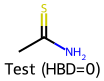

In [8]:
# Link: https://docs.eyesopen.com/toolkits/python/molproptk/OEMolPropFunctions/OEGetHBondDonorCount.html
# Find all HBD atoms in the molecule, defined by OpenEye (SMARTS representation of ROCS, Journal of Computer-Aided Molecular Design, Vol. 10, pp. 607, 1996.)
HDonorSmarts = rdkit.Chem.MolFromSmarts("[$([#7,#8,#15,#16]);H]")
hbd_atoms = [atom[0] for atom in mol.GetSubstructMatches(HDonorSmarts, uniquify=1)]
hbd = len(hbd_atoms)

# Highlight nitrogen atoms in blue
img = draw_molecule(mol,
    legend = name + f" (HBD={hbd})", 
    highlight_atoms = hbd_atoms,
    highlight_color = (0.4, 0.7, 1.0)
)
SVG(img)